In [14]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
# import ipywidgets as widgets       # interactive display
# from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

a) Plots

In [9]:
def LIF(I = 0.05, V_th= -55, V_reset = -75,   
    tau_m = 10, g_L = 10/1000, V_init = -65, V_L = -75,       
    dt = 0.1, n_iter = 1000 ,tref = 2):
    
    # Initialize voltage and current 
    v = np.zeros(n_iter)
    v[0] = V_init
    I = I * np.ones(n_iter) 
    tr = 0.0
    
    time = np.array([*range(n_iter)])*dt
    
    # simulate the LIF dynamics 
    rec_spikes = []               # record spike times
    for index in range(n_iter-1):
      if tr >0:
            v[index] = V_reset
            tr = tr-1
      elif v[index] >= V_th:         #reset voltage and record spike event
            rec_spikes.append(index)
            v[index] = V_reset
            tr = tref/dt
      #calculate the increment of the membrane potential
      dv = ( ( -(v[index]-V_L))**1  + I[index]/g_L  ) * (dt/tau_m) #+ np.exp(v[it]-V_L-10)
        
      #update the membrane potential
      v[index+1] = v[index] + dv
        
    rec_spikes = np.array(rec_spikes) * dt
        
    return v, rec_spikes, I, time

In [23]:
vhist, spikes ,iapp , time  = LIF(I = 11)  # Set for microA

Text(0, 0.5, 'I (mA)')

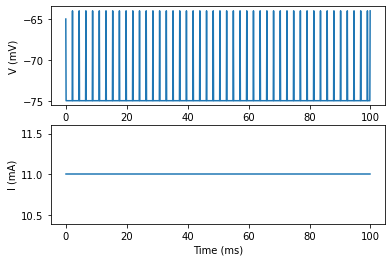

In [24]:
plt.subplot(2,1,1)

plt.plot(time, vhist)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

plt.subplot(2,1,2)

plt.plot(time, iapp)
plt.xlabel('Time (ms)')
plt.ylabel('I (mA)')

#plt.savefig("LIFi5.pdf")

b) Current, Maximum and Minimum Frequency

In [18]:
def LIF_c(I, V_th= -55, V_reset = -75,   
    tau_m = 10, g_L = 10/1000, V_init = -65, V_L = -75,       
    dt = 0.1, n_iter = 1000 ,tref = 2):
    
    # Initialize voltage and current 
    n_iter = len(I)
    v = np.zeros(n_iter)
    v[0] = V_init
    tr = 0.0
    
    time = np.array([*range(n_iter)])*dt
    
    # simulate the LIF dynamics 
    rec_spikes = []               # record spike times
    for index in range(n_iter-1):
      if tr >0:
            v[index] = V_reset
            tr = tr-1
      elif v[index] >= V_th:         #reset voltage and record spike event
            rec_spikes.append(index)
            v[index] = V_reset
            tr = tref/dt
      #calculate the increment of the membrane potential
      dv = ( ( -(v[index]-V_L))**1  + I[index]/g_L  ) * (dt/tau_m) #+ np.exp(v[it]-V_L-10)
        
      #update the membrane potential
      v[index+1] = v[index] + dv
        
    rec_spikes = np.array(rec_spikes) * dt
        
    return v, rec_spikes, time

In [4]:
I_range =  np.arange(0, 15, 0.01)

In [5]:
vhist, spikes , time  = LIF_c(I_range)  # Set for microA

In [6]:
# Making frequency list from spikes

time_diffs = []
time_diffs.append(0.1)

for i in range(len(spikes)-1):
    time_diffs.append(spikes[i+1] - spikes[i])
    
freq = []

for i in range(len(time_diffs)):
    if i == 0:
        freq.append(1/time_diffs[i+1])
        continue
    freq.append(1/time_diffs[i])
    
print(len(spikes))
print(len(freq))
print(len(I_range))

print(len(time))

current_spike = []

for i in spikes:
    j = np.where(time == i)[0][0]
    current_spike.append(I_range[j])
    
print(len(current_spike))

60
60
1500
1500
60


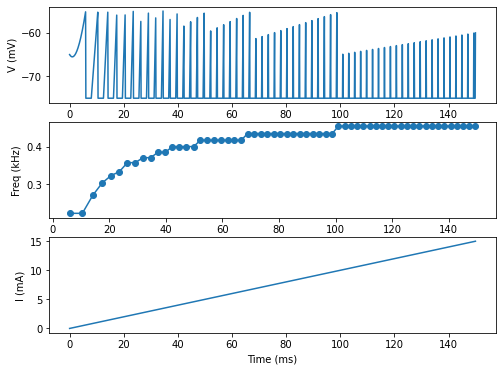

In [10]:
plt.subplot(3,1,1)

plt.plot(time, vhist)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

plt.subplot(3,1,2)

plt.plot(spikes, freq, 'o-')
plt.xlabel('Time (ms)')
plt.ylabel('Freq (kHz)')

plt.subplot(3,1,3)

plt.plot(time, I_range)
plt.xlabel('Time (ms)')
plt.ylabel('I (mA)')

#plt.savefig("LIF_limits.pdf")

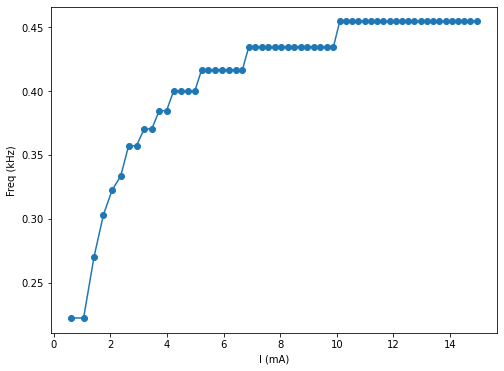

In [13]:
plt.plot(current_spike, freq, 'o-')
plt.xlabel('I (mA)')
plt.ylabel('Freq (kHz)')

plt.savefig("LIF_fi.pdf")

Firing irregularity vs Applied Currents

In [17]:
def GWN(sig, myseed=False, 
          dt = 0.1, I_len = 1000):

    # set random seed
    if myseed:
        np.random.seed(seed=myseed) 
    else:
        np.random.seed()
        
    #generate GWN
    I =  sig * np.random.randn(I_len) / np.sqrt(dt/1000.)
    
    return I

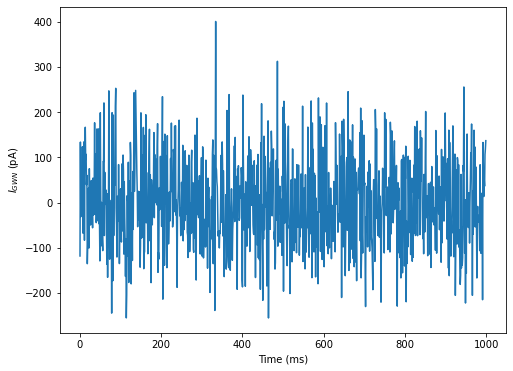

In [63]:
# Checking code and what not
I_GWN = GWN(sig=1, myseed=404, I_len= 1000)
plt.plot(I_GWN)
plt.xlabel('Time (ms)')
plt.ylabel(r'$I_{GWN}$ (pA)');

Text(0, 0.5, 'V (mV)')

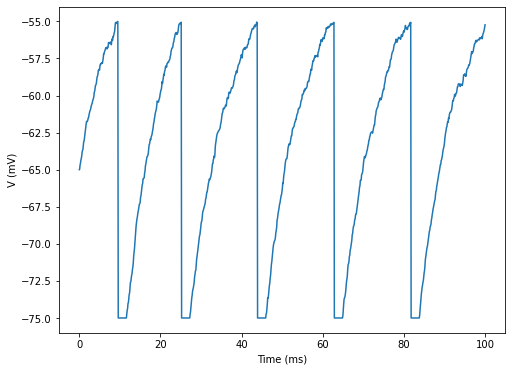

In [64]:
# PLotting that code then
vhist, spikes , time  = LIF_c(I = (I_GWN + 250)*0.001 ) # Set for microA
plt.plot(time, vhist)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

In [71]:
I_mean = np.arange(100,500,25)
I_std = np.arange(0.,20,2)
spk_count = np.zeros((len(I_mean),len(I_std)))
cv_isi = np.empty((len(I_mean),len(I_std)))
cv_isi[:] = np.NaN

for i in range(len(I_mean)):
    for j in range(len(I_std)):
        I_GWN = GWN(sig=I_std[j], myseed=2000, I_len =1500)
        I_noise = (I_GWN + I_mean[i])*0.001
        v, rec_spikes, time = LIF_c(I=I_noise)
        spk_count[i,j] = len(rec_spikes)
        if len(rec_spikes)>3:
            isi = np.diff(rec_spikes)
            cv_isi[i,j] = np.std(isi)/np.mean(isi)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 576x432 with 0 Axes>

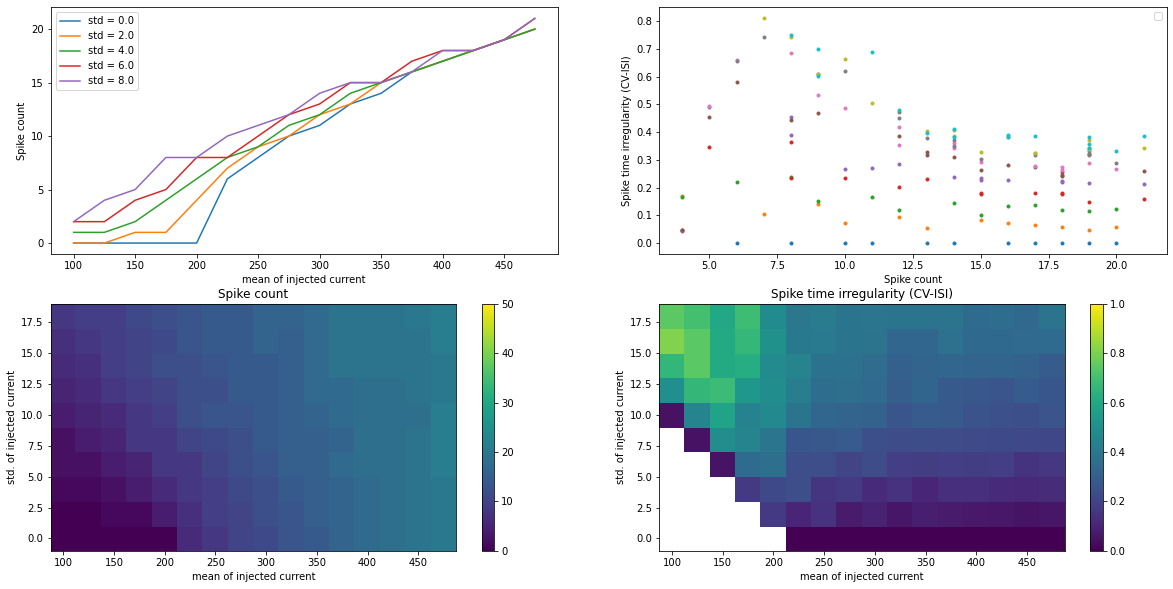

In [74]:
plt.figure()
plt.figure(figsize=(20, 10))

# Plot the F-I curve i.e. Output firing rate as a function of input mean. Different lines correspond to different std. 
# Note how std changes the F-I curve
plt.subplot(2,2,1)
for i in range(5):
    plt.plot(I_mean,spk_count[:,i],label='std = '+str(I_std[i]))
plt.ylabel('Spike count')
plt.xlabel('mean of injected current');
plt.legend()

# Plot firing rate vs coeffcient of variance of inter-spike interval
# Do you see any pattern here? 
plt.subplot(2,2,2)
plt.plot(spk_count,cv_isi,'.')
plt.xlabel('Spike count')
plt.ylabel('Spike time irregularity (CV-ISI)');
plt.legend()

# Plot Firing rate as a function of both mean and std. Firing rate is rendered as color
plt.subplot(2,2,3)
plt.pcolor(I_mean,I_std,spk_count.T)
plt.ylabel('std. of injected current')
plt.xlabel('mean of injected current');
plt.colorbar()
plt.clim(0,50)
plt.title('Spike count');

# Plot Spike time irregularity (CV_ISI) as a function of both mean and std. CV_isi is rendered as color
plt.subplot(2,2,4)
plt.pcolor(I_mean,I_std,cv_isi.T)
plt.ylabel('std. of injected current')
plt.xlabel('mean of injected current');
plt.colorbar()
plt.clim(0,1)
plt.title('Spike time irregularity (CV-ISI)');

#plt.savefig("CV_LIF.pdf")

In [43]:
frequency = []
current_sp = []

In [56]:
I_range =  np.arange(0, 15, 0.001)
I_range = I_range + GWN(sig=10, myseed=404, I_len= len(I_range))*0.001

In [57]:
vhist, spikes , time  = LIF_c(I_range)  # Set for microA

In [58]:
time_diffs = []
time_diffs.append(0.1)

for i in range(len(spikes)-1):
    time_diffs.append(spikes[i+1] - spikes[i])
    
freq = []

for i in range(len(time_diffs)):
    if i == 0:
        freq.append(1/time_diffs[i+1])
        continue
    freq.append(1/time_diffs[i])
    
# print(len(spikes))
# print(len(freq))
# print(len(I_range))

# print(len(time))

current_spike = []

for i in spikes:
    j = np.where(time == i)[0][0]
    current_spike.append(I_range[j])

In [59]:
frequency.append(freq)
current_sp.append(current_spike)

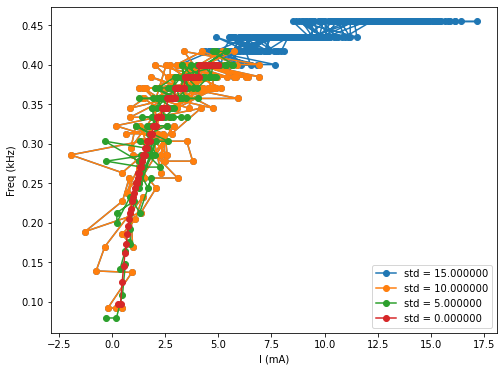

In [64]:
std = [0, 5, 10, 15]
for i in reversed(range(len(std))):
    plt.plot(current_sp[i], frequency[i], 'o-', label = "std = %f" % std[i] )
plt.xlabel('I (mA)')
plt.ylabel('Freq (kHz)')
plt.legend()

plt.savefig("LIF_nfi.pdf")